### Telcom National (TN) wants to determine if a customer is likely to churn

In [1]:
# Import all necessary libraries.
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
from sklearn import metrics
import statsmodels.api as sm  

# Note: Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split

import warnings  
warnings.filterwarnings('ignore')  

df = pd.read_csv('LSE_DA301_Week_2_files/Data/customer_data.csv')  

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

In [2]:
# [1] Update all the details of the education column:
df.loc[df['Edu'].str.contains('basic'),'Edu' ] = 'pre-school'
df.loc[df['Edu'].str.contains('university'),'Edu' ] = 'uni'
df.loc[df['Edu'].str.contains('high'),'Edu' ] = 'high-school'
df.loc[df['Edu'].str.contains('professional') ,'Edu'] = 'masters'
df.loc[df['Edu'].str.contains('illiterate'),'Edu' ] = 'other'
df.loc[df['Edu'].str.contains('unknown'),'Edu' ] = 'other'

# [2] Display all the unique values/check changes.
df['Edu'].unique() 

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [3]:
df['Edu']

0         pre-school
1              other
2                uni
3        high-school
4         pre-school
            ...     
41183    high-school
41184     pre-school
41185            uni
41186        masters
41187    high-school
Name: Edu, Length: 41188, dtype: object

#### Below we create dummy vars - just to be consistent with BLR and SVM models that we used on this data. May not really need them with decision trees though e.g. if the values re already discrete.

In [4]:
# Name new DataFrame and convert categorical variables to dummy variables:
cat_vars=['Occupation','Status','Edu','House','Loan',
          'Comm','Month','DOW','Last_out']

for var in cat_vars:  
    # cat_list='var'+'_'+var
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix=var)  
    # Indicate the joining of the DataFrames.
    df=df.join(cat_list) 

df_fin = df.drop(cat_vars,axis=1) 

# Specify the column names:
cat_vars=['Occupation','Status','Edu','House','Loan',
          'Comm','Month','DOW','Last_out']

# Set a temporary DataFrame and add values.
df_vars=df.columns.values.tolist()  

# Indicate what columns are kept.
to_keep=[i for i in df_vars if i not in cat_vars] 

# Define new DataFrame.
df_fin=df[to_keep]  

# Print the column.
df_fin.columns.values 

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

#### Balance the data - again for consistency with what we did for BLR and SVM - using SMOTE. 
Also doing the train/test split here

In [6]:
# Create a DataFrame to use as df_fin and replace missing values with zero.
df_fin = df_fin.fillna(0)  

# Select necessary columns: 
nec_cols = [ 'Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

X = df_fin[nec_cols]
y = df_fin['Target']

# Create a new DataFrame and 
# apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify column values.
columns = X_train.columns  
# Specify the new data sets.
os_data_X,os_data_y=os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])

# Print/check the DataFrame:
print("length of oversampled data is ",len(os_data_X))

os_data_y

length of oversampled data is  51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


In [7]:
# Determine if values in a column are balanced.
os_data_y['Target'].value_counts()  

0    25567
1    25567
Name: Target, dtype: int64

#### Decision tree from SKlearn

In [8]:
# Import the DecisionTreeClassifier class from sklearn. 
from sklearn.tree import DecisionTreeClassifier  

# Create a classification decision tree classifier object as dtc: 
dtc = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Train the decision tree classifier.
dtc = dtc.fit(os_data_X, os_data_y) 

# Predict the response for the test data set.
y_pred = dtc.predict(X_test)  

#### accuracy 

In [9]:
# Import scikit-learn metrics module for accuracy calculation:
from sklearn.metrics import confusion_matrix

# Use the print() function to display the confusion matrix results:
print(confusion_matrix(y_test, y_pred))

# Metrics for accuracy.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

# Metrics for precision. 
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# Metrics for recall.
print("Recall:",metrics.recall_score(y_test, y_pred)) 

[[8561 2420]
 [ 956  420]]
Accuracy: 0.726794529416525
Precision: 0.14788732394366197
Recall: 0.30523255813953487


#### Classification report

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     10981
           1       0.15      0.31      0.20      1376

    accuracy                           0.73     12357
   macro avg       0.52      0.54      0.52     12357
weighted avg       0.82      0.73      0.76     12357



#### Comments

accuracy (72.7% = okish)

precision (14.8%) is very low

recall (30%) is fairly low. Means we are incorrectly classifying many pos cases i.e. 2420 FPs)

#### visualise

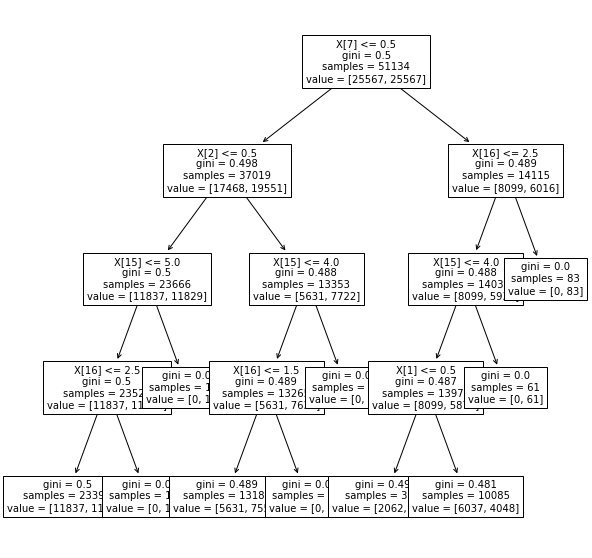

In [11]:
# Import matplotlib to create a visualisation 
# and the tree package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc, fontsize=10)

# Print the plot with plt.show().
plt.show() 